In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si nos da un error este comando es por no tenerlo instalado
from datetime import date, datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns=None
# establecer el tamaño de nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [25]:
df = pd.read_csv('data/totales_encod.csv', index_col = 0)
df.head(2)

,registro,clima,temperatura,sens_termica,humedad,viento,total,fecha_nueva,festividad,festividad_1,mes_bueno,dia_semana_nuevo,no_laboral_nuevo,año_map,estacion_map
0,1,2,14.1,18.2,81.0,10.7,985,2018-01-01,New Year's Day,1,1,0,0,0,0
1,2,2,14.9,17.7,70.0,16.7,801,2018-01-02,NaN,0,1,1,1,0,0


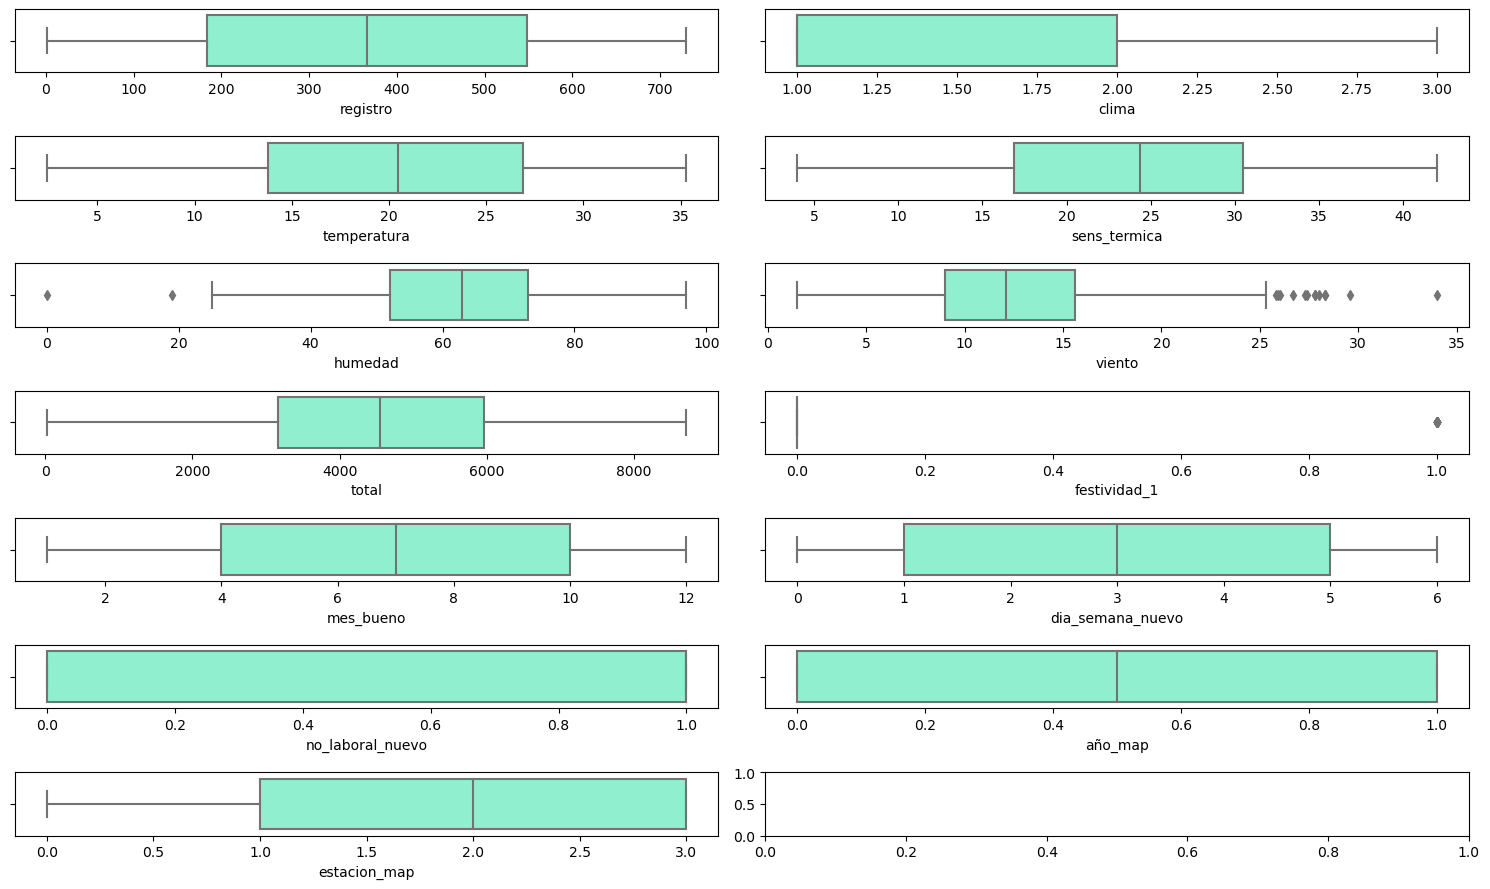

In [26]:
fig, axes = plt.subplots(7,2, figsize=(15,9))

axes = axes.flat
numericas = df.select_dtypes(include = np.number)
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 

    
plt.tight_layout()
plt.show()

Eliminamos los outliers de la columna 'viento'

In [27]:
df['viento'].mean()

12.764794520547941

In [28]:
df['viento'].median()

12.1

In [29]:

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    ##tenemos el diccionario de indices de las filas que tienen outliers, pero lo ideal seria que extraer los dataframes para cargas y trabaar con ese dataframe.
    ##dicc_dataframes={}

    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        ##aqui creo una key que va a ser diferente por cada columna y cuyo value sea el dataframe que acao de crear. Keys seran los nombres de als coumnas y value los dataframes.
        ##dicc_dataframes[col]=outliers_data
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices #, dicc_dataframes

In [30]:
lista_columnas = ['viento']

In [31]:
ind_viento = detectar_outliers(lista_columnas, df)

In [32]:
ind_viento

{'viento': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]}

In [43]:
for k, v in ind_viento.items():
    media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v:# iteremos por la lista de valores para cada columna
        df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio